# Python project
The purpose and goal with the analysis is to explore functions and syntax in python, 

to find information in the data and to be familiar with the fundamental basics infrastructures within python.

The report has conducted findings and insights in the data.

starting with the essentials

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import seaborn as sns

Read data

In [2]:
df = pd.read_csv('/Users/lucy/Documents/Vinter/merged_goldeikon.csv')

In [3]:
newdf = pd.read_csv('/Users/lucy/Documents/Vinter/merged_goldeikon.csv')

In [4]:
df = newdf

In [38]:
df = pd.read_csv('/Users/lucy/Documents/Vinter/merged_goldeikon.csv')
df.index = pd.to_datetime(df['datetime'])

# Describe Data set 
when describing the dataset we get a summary and overview on it's context

In [5]:
df.head(5)

,datetime,close,amount,ex_symbol
0,2021-02-04,173.26,354292.0,l_sgld
1,2021-02-03,177.79,26805.0,l_sgld
2,2021-02-02,177.91,21356.0,l_sgld
3,2021-02-01,180.30,38422.0,l_sgld
4,2021-01-29,179.91,102532.0,l_sgld


In [6]:
df.describe().round()

,close,amount
count,11968.0,11968.0
mean,253.0,104135.0
std,386.0,434652.0
min,21.0,1.0
25%,120.0,3008.0
50%,126.0,11637.0
75%,155.0,55862.0
max,1959.0,17085971.0


# Exchange Traded Fund
We can find information about the diffrent etf's and it's values

In [7]:
df['ex_symbol'].unique()

array(['l_sgld', 's_sgld', 'l_igln', 'l_xgld', 's_xgld', 'l_gbsx',
       'l_phau', 's_csgold', 'l_sgbs', 's_zgldus'], dtype=object)

In [8]:
df['ex_symbol'].nunique()

10

In [9]:
df["ex_symbol"].value_counts()

l_phau      1289
l_igln      1289
l_gbsx      1289
l_sgld      1289
l_xgld      1289
l_sgbs      1280
s_zgldus    1279
s_csgold    1279
s_sgld      1005
s_xgld       680
Name: ex_symbol, dtype: int64

In [10]:
df.groupby(['ex_symbol','datetime']).mean().unstack(0)

close                                                          \
ex_symbol   l_gbsx l_igln  l_phau  l_sgbs  l_sgld  l_xgld s_csgold  s_sgld   
datetime                                                                     
2016-01-04  102.54  21.26  103.78  105.05  105.53  105.82   105.54  105.91   
2016-01-05  102.82  21.32  104.23  105.32  105.81  106.08   105.43  105.65   
2016-01-06  103.97  21.55  105.45  106.52  107.06  107.29   106.63  106.80   
2016-01-07  105.51  21.87  106.93  108.09  108.57  108.86   108.27  108.39   
2016-01-08  105.29  21.83  106.73  107.88  108.36  108.64   107.90  108.23   
...            ...    ...     ...     ...     ...     ...      ...     ...   
2021-01-29  173.39  36.29  175.98  179.01  179.91  180.31   179.44  179.92   
2021-02-01  173.89  36.35  176.55  179.53  180.30  180.58   180.00  180.14   
2021-02-02  171.48  35.89  174.06  177.19  177.91  178.22   177.64  177.90   
2021-02-03  171.33  35.89  173.93  176.86  177.79  178.32   177.40  177.34   
2021-02-04  166.91  34.95  169.52  172.31  173.26  173.56   172.64  173.26   

                               amount                                         \
ex_symbol   s_xgld s_zgldus    l_gbsx    l_igln   l_phau   l_sgbs     l_sgld   
datetime                                                                       
2016-01-04  105.86  1048.21   35927.0   48848.0  33808.0   1567.0    24000.0   
2016-01-05     NaN  1046.98   33608.0    9965.0  36818.0  10031.0    83773.0   
2016-01-06     NaN  1060.15   64732.0   46331.0  64272.0  18042.0  1111497.0   
2016-01-07     NaN  1076.09   98517.0   32573.0  76768.0   3894.0  1777423.0   
2016-01-08  107.46  1072.90  126175.0   11128.0  26347.0  53428.0   137534.0   
...            ...      ...       ...       ...      ...      ...        ...   
2021-01-29  179.70  1767.80   21223.0  597622.0  32265.0   9106.0   102532.0   
2021-02-01  181.18  1770.60    7814.0  489657.0  27440.0   3394.0    38422.0   
2021-02-02  177.74  1751.00   18496.0  170826.0  17446.0   7886.0    21356.0   
2021-02-03     NaN  1748.20    9872.0  257208.0  21328.0   1895.0    26805.0   
2021-02-04  173.56  1703.60   23698.0  823755.0  36196.0  20074.0   354292.0   

                                                        
ex_symbol    l_xgld s_csgold   s_sgld  s_xgld s_zgldus  
datetime                                                
2016-01-04   4897.0   4263.0   8163.0  2000.0    542.0  
2016-01-05   3206.0   1110.0   8000.0     NaN   2986.0  
2016-01-06   7774.0   6468.0  33995.0     NaN   4357.0  
2016-01-07    166.0   2941.0  11758.0     NaN  12058.0  
2016-01-08   3284.0   7154.0   6487.0   600.0   1862.0  
...             ...      ...      ...     ...      ...  
2021-01-29   4480.0  13010.0  14462.0    76.0   6620.0  
2021-02-01   7522.0  15816.0  18959.0   526.0   2723.0  
2021-02-02   3892.0   3675.0  12561.0   190.0   1688.0  
2021-02-03   2274.0   2783.0  11332.0     NaN   1421.0  
2021-02-04  13199.0   2963.0  18542.0  4200.0   4301.0  

[1305 rows x 20 columns]

In [11]:
df1 = df.groupby(['ex_symbol','datetime'])['close'].mean().unstack(0) 
df1

ex_symbol,l_gbsx,l_igln,l_phau,l_sgbs,l_sgld,l_xgld,s_csgold,s_sgld,s_xgld,s_zgldus
datetime,,,,,,,,,,
2016-01-04,102.54,21.26,103.78,105.05,105.53,105.82,105.54,105.91,105.86,1048.21
2016-01-05,102.82,21.32,104.23,105.32,105.81,106.08,105.43,105.65,NaN,1046.98
2016-01-06,103.97,21.55,105.45,106.52,107.06,107.29,106.63,106.80,NaN,1060.15
2016-01-07,105.51,21.87,106.93,108.09,108.57,108.86,108.27,108.39,NaN,1076.09
2016-01-08,105.29,21.83,106.73,107.88,108.36,108.64,107.90,108.23,107.46,1072.90
...,...,...,...,...,...,...,...,...,...,...
2021-01-29,173.39,36.29,175.98,179.01,179.91,180.31,179.44,179.92,179.70,1767.80
2021-02-01,173.89,36.35,176.55,179.53,180.30,180.58,180.00,180.14,181.18,1770.60
2021-02-02,171.48,35.89,174.06,177.19,177.91,178.22,177.64,177.90,177.74,1751.00


In [12]:
df1.dtypes

ex_symbol
l_gbsx      float64
l_igln      float64
l_phau      float64
l_sgbs      float64
l_sgld      float64
l_xgld      float64
s_csgold    float64
s_sgld      float64
s_xgld      float64
s_zgldus    float64
dtype: object

In [13]:
df1.dtypes.index

Index(['l_gbsx', 'l_igln', 'l_phau', 'l_sgbs', 'l_sgld', 'l_xgld', 's_csgold',
       's_sgld', 's_xgld', 's_zgldus'],
      dtype='object', name='ex_symbol')

# matplotlib
with these timeserie analyses we get an overview on the amount and close during the time interval. 

<AxesSubplot:xlabel='datetime'>

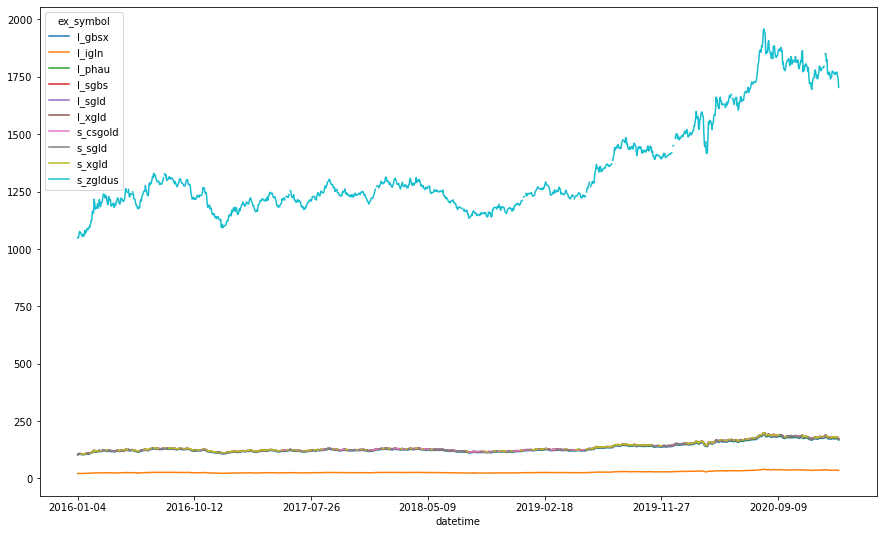

In [14]:
df1.plot(figsize = (15,9)) # Can you put s_zgldus on a second y-axis in the same graph?

# Second Y axis


In [15]:
df['datetime'] = pd.to_datetime(df['datetime'])

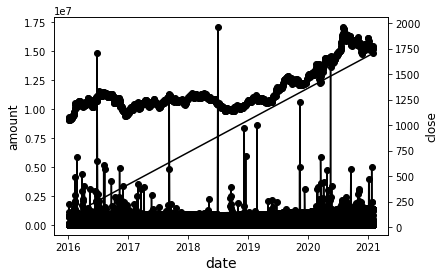

In [16]:
fig,ax = plt.subplots()
ax.plot(df.datetime, df.amount, color="black", marker="o")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("amount",color="black",fontsize=12)
ax2=ax.twinx()
ax2.plot(df.datetime, df["close"],color="black",marker="o")
ax2.set_ylabel("close",color="black",fontsize=12)
plt.show()

In [46]:
# read csv into variable
df_merged = pd.read_csv("/Users/lucy/Documents/Vinter/merged_goldeikon.csv", parse_dates=[0], index_col=0)

In [ ]:
#https://www.javaer101.com/en/article/41328978.html

<Figure size 432x288 with 0 Axes>

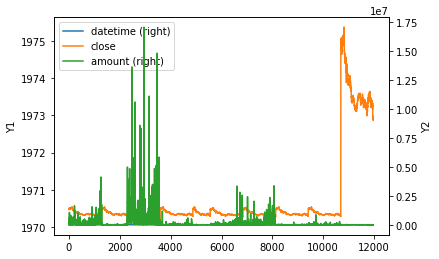

In [17]:
plt.figure()
ax = df.plot(secondary_y=['datetime', 'amount'])
ax.set_ylabel('Y1')
ax.right_ax.set_ylabel('Y2', color='black')
plt.show()

In [18]:
#https://pandas.pydata.org/pandas-docs/version/0.13/visualization.html

<AxesSubplot:xlabel='datetime'>

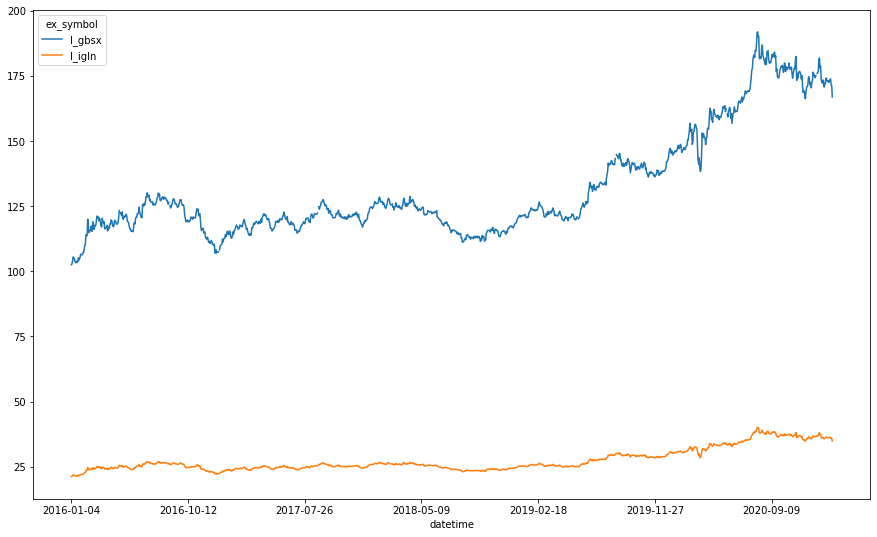

In [19]:
df1[['l_gbsx', 'l_igln']].plot(figsize = (15,9)) 
# Same here, define a function that allows you to graph two timeseries with different y-axis
# one on the right and the other on the left.

In [20]:
newdf1 = newdf.groupby(['ex_symbol','datetime'])['amount'].mean().unstack(0)
newdf1

ex_symbol,l_gbsx,l_igln,l_phau,l_sgbs,l_sgld,l_xgld,s_csgold,s_sgld,s_xgld,s_zgldus
datetime,,,,,,,,,,
2016-01-04,35927.0,48848.0,33808.0,1567.0,24000.0,4897.0,4263.0,8163.0,2000.0,542.0
2016-01-05,33608.0,9965.0,36818.0,10031.0,83773.0,3206.0,1110.0,8000.0,NaN,2986.0
2016-01-06,64732.0,46331.0,64272.0,18042.0,1111497.0,7774.0,6468.0,33995.0,NaN,4357.0
2016-01-07,98517.0,32573.0,76768.0,3894.0,1777423.0,166.0,2941.0,11758.0,NaN,12058.0
2016-01-08,126175.0,11128.0,26347.0,53428.0,137534.0,3284.0,7154.0,6487.0,600.0,1862.0
...,...,...,...,...,...,...,...,...,...,...
2021-01-29,21223.0,597622.0,32265.0,9106.0,102532.0,4480.0,13010.0,14462.0,76.0,6620.0
2021-02-01,7814.0,489657.0,27440.0,3394.0,38422.0,7522.0,15816.0,18959.0,526.0,2723.0
2021-02-02,18496.0,170826.0,17446.0,7886.0,21356.0,3892.0,3675.0,12561.0,190.0,1688.0


<AxesSubplot:xlabel='datetime'>

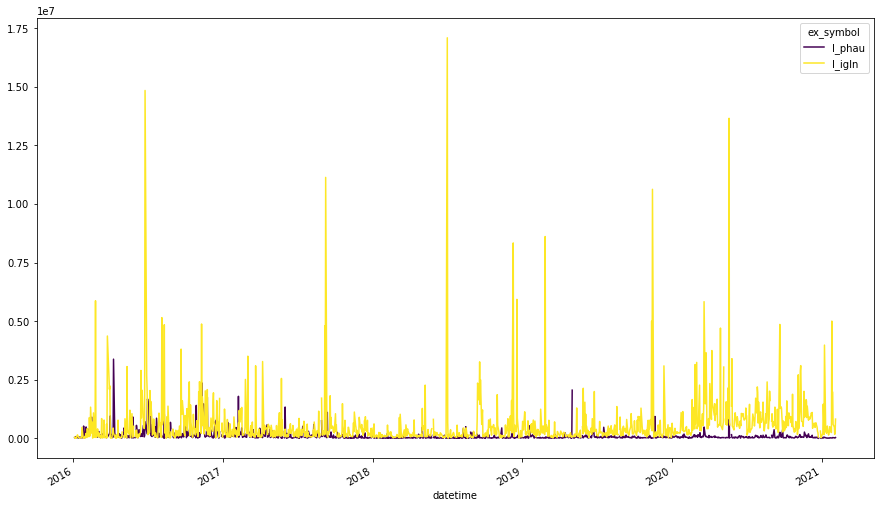

In [21]:
newdf1[['l_phau', 'l_igln']].plot(figsize = (15,9), colormap='viridis')
# Plot the last year only.

In [22]:
#plot last year

In [23]:
nbr_days = df['datetime'].count()
nbr_days_open = df['ex_symbol'].count()

round(nbr_days_open/nbr_days, 2)

1.0

In [24]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month

df.head(1)

,datetime,close,amount,ex_symbol,year,month
0,2021-02-04,173.26,354292.0,l_sgld,2021,2


<AxesSubplot:xlabel='datetime'>

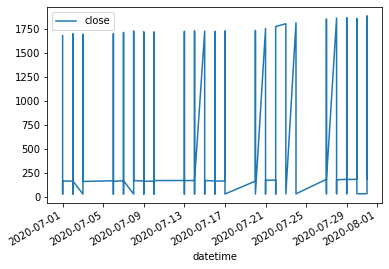

In [34]:
mask = (df['year'] == 2020) & (df['month'] == 7)

df[mask].plot.line(x='datetime', y=['close'])

In [26]:
newdf['datetime'] = pd.to_datetime(newdf['datetime'])

<AxesSubplot:xlabel='datetime'>

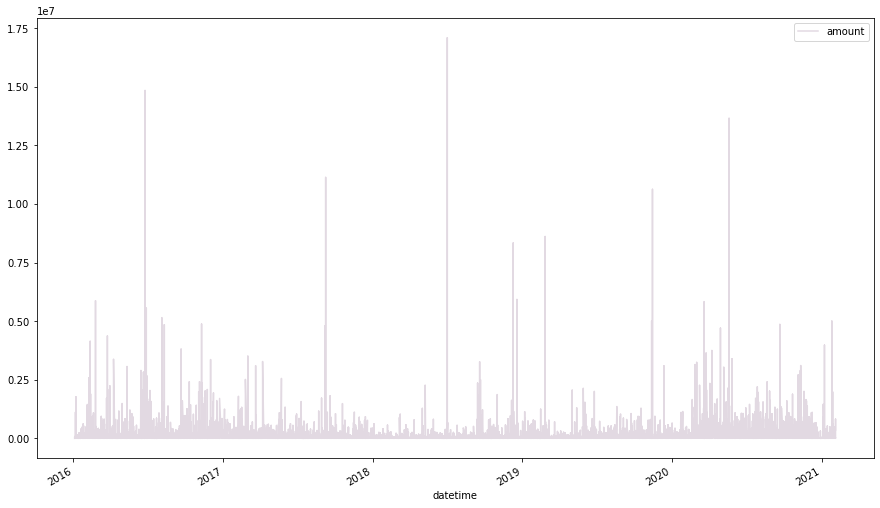

In [27]:
newdf.plot.line(x='datetime', y='amount', colormap='twilight', grid=False, figsize = (15,9))
# Plot only last year.

In [28]:
time = df['datetime'].count()
symbol = df['ex_symbol'].count()

round(time/symbol, 2)

1.0

In [29]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month

df.head(1)

,datetime,close,amount,ex_symbol,year,month
0,2021-02-04,173.26,354292.0,l_sgld,2021,2


<AxesSubplot:xlabel='datetime'>

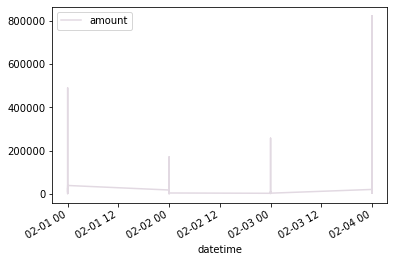

In [30]:
mask = (df['year'] == 2021) & (df['month'] == 2)

df[mask].plot.line(x='datetime', y=['amount'], colormap='twilight')


In [ ]:
#matplotlib syntax

Histogram with seaborn

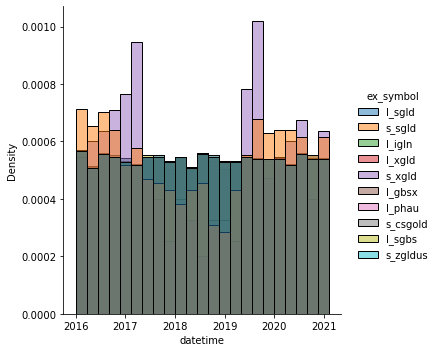

In [24]:
sns.displot(newdf, x="datetime", hue="ex_symbol", stat="density", common_norm=False)
# Pls add some description about this graph, what is it showing?

Barplot

whale trade size

Text(0, 0.5, 'Value')

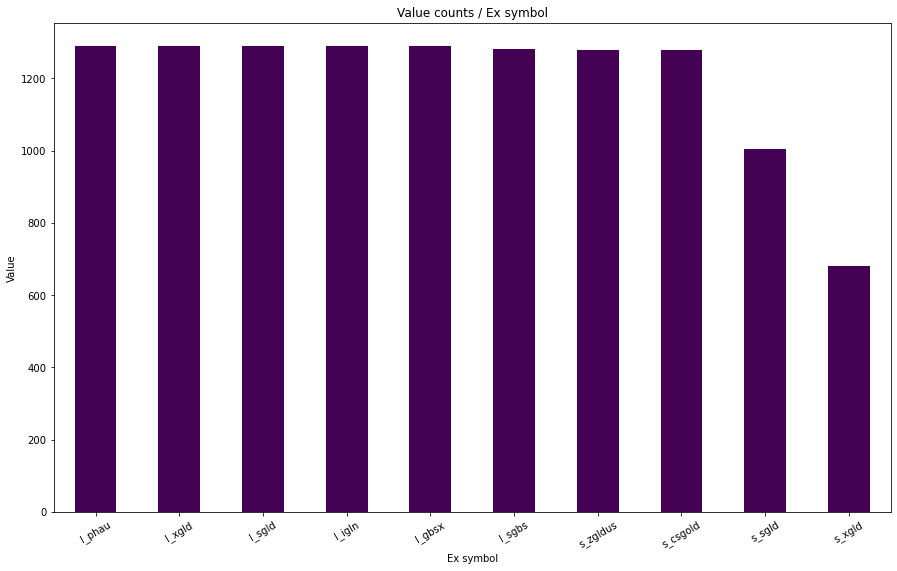

In [25]:
plotdata = pd.DataFrame(
    {"value": [1289,1289,1289,1289,1289,1280,1279,1279,1005,680]}, 
    index=['l_phau','l_xgld','l_sgld','l_igln','l_gbsx','l_sgbs','s_zgldus','s_csgold','s_sgld','s_xgld'])
plotdata['value'].plot(kind="bar", title="test", figsize = (15,9), colormap='viridis')
plt.title("Value counts / Ex symbol")
plt.xlabel("Ex symbol")
plt.xticks(rotation=30, horizontalalignment="center")
plt.ylabel("Value")

Text(0, 0.5, 'Value')

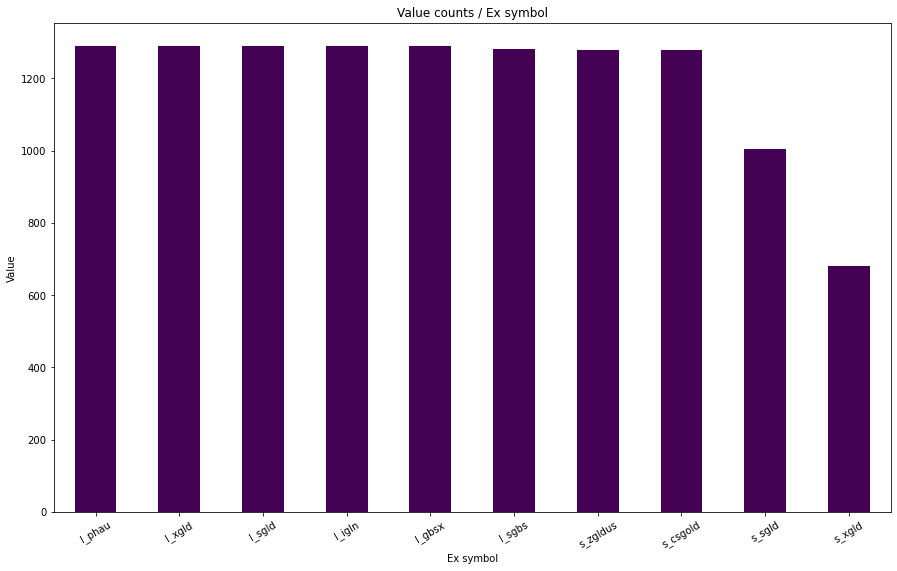

In [26]:
plotdata = pd.DataFrame(
    {"value": [1289,1289,1289,1289,1289,1280,1279,1279,1005,680]}, 
    # do not hard code, get this values from variables or the original dataframe df
    index=['l_phau','l_xgld','l_sgld','l_igln','l_gbsx','l_sgbs','s_zgldus','s_csgold','s_sgld','s_xgld'])
    #it's possible to get this from df dont hard code.
plotdata['value'].plot(kind="bar", title="test", figsize = (15,9), colormap='viridis')
plt.title("Value counts / Ex symbol")
plt.xlabel("Ex symbol")
plt.xticks(rotation=30, horizontalalignment="center")
plt.ylabel("Value")
# Same, add a description about this graph, what is it showing and what do you why did you choose it?

Hexbin

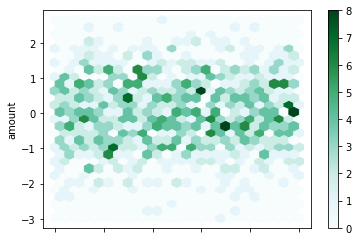

In [27]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=["datetime", "amount"])

df["datetime"] = df["amount"] + np.arange(1000) 

df.plot.hexbin(x="datetime", y="amount", gridsize=25);

# I believe those are random values but it will be better to apply this type of graph to the actual
# amount column for different etf.
# Evaluate if this value it's useful and what you want to show with it, if there's no relevance delete it.

Subplot

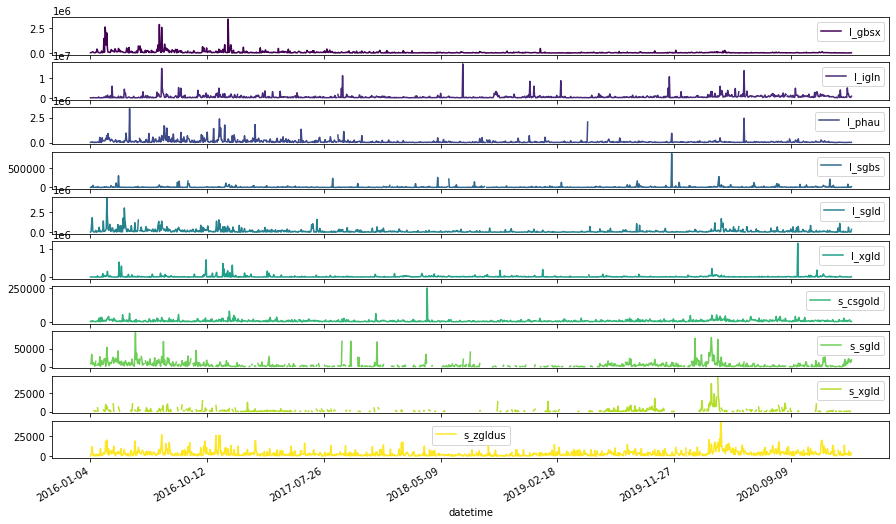

In [28]:
newdf1.plot(subplots=True, colormap='viridis', figsize=(15,9));
# try adding more parameters to the function to make it look more visually attractive,
# It's very hard to get any information from this.
# perhaps only plot the last year.

# Time series analysis, Selecting specific time
(one year or by monthly)  

In [29]:
# The graph doesnt seem accurate, but i believe it's because you're plotting everything together
# make the same graph but for each symbol or only one (the most important according to your analysis)

In [30]:
# good with the groupby functions and storaging the results in new variables
# now you put the import libraries at the beginning, great.
# try to work more with slicing timeseries index. google it or check the pandas guide.

groupby time series analysis

# Indexing

Identifies data

data alignment

subsets of the data set

focus on Series and DataFrame

time series index and create functions.

In [68]:
df = pd.read_csv('/Users/lucy/Documents/Vinter/merged_goldeikon.csv')
df.head()

,datetime,close,amount,ex_symbol
0,2021-02-04,173.26,354292.0,l_sgld
1,2021-02-03,177.79,26805.0,l_sgld
2,2021-02-02,177.91,21356.0,l_sgld
3,2021-02-01,180.30,38422.0,l_sgld
4,2021-01-29,179.91,102532.0,l_sgld


In [77]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.loc[df.datetime.dt.year == 2018, :]

,datetime,close,amount,ex_symbol
531,2018-12-31,124.85,4117.0,l_sgld
532,2018-12-28,124.34,128209.0,l_sgld
533,2018-12-27,123.92,22332.0,l_sgld
534,2018-12-24,122.84,6941.0,l_sgld
535,2018-12-21,122.50,33046.0,l_sgld
...,...,...,...,...
11458,2018-01-09,1267.00,930.0,s_zgldus
11459,2018-01-08,1273.80,2323.0,s_zgldus
11460,2018-01-05,1274.00,8862.0,s_zgldus
11461,2018-01-04,1274.20,998.0,s_zgldus


In [ ]:
#separate if the datais messy, cleaning, adapt the dataset to what want to see, 
#separeta by symbol, group by, slicing, lot

In [ ]:
#practise explain describe check this relevant apply select, describe this is to see this, changes

Heatmap

Create one function where you use matplotlib library to plot two graphs in the same chart with different y-axis.

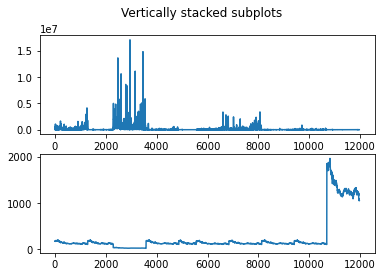

In [85]:
fig, axs = plt.subplots(2)
(df['amount'])
fig.suptitle('Vertically stacked subplots')
axs[0].plot(df['amount'])
axs[1].plot(df['close'])

In [ ]:
#testing diffrent subplots

Subplot

In [ ]:
#work more with slicing timeseries index. google it or check the pandas guide.

slicing timeseries index
https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html

In [3]:
data = pd.read_csv('/Users/lucy/Documents/Vinter/merged_goldeikon.csv')

In [5]:
data.plot

In [15]:
from datetime import datetime

In [16]:
ts_days_idx = pd.date_range('2019-11-25', periods=10)
ts_days_idx

DatetimeIndex(['2019-11-25', '2019-11-26', '2019-11-27', '2019-11-28',
               '2019-11-29', '2019-11-30', '2019-12-01', '2019-12-02',
               '2019-12-03', '2019-12-04'],
              dtype='datetime64[ns]', freq='D')

In [17]:
data["datetime"] = pd.to_datetime(data["datetime"])

In [18]:
data["datetime"]

0       2021-02-04
1       2021-02-03
2       2021-02-02
3       2021-02-01
4       2021-01-29
           ...    
11963   2016-01-08
11964   2016-01-07
11965   2016-01-06
11966   2016-01-05
11967   2016-01-04
Name: datetime, Length: 11968, dtype: datetime64[ns]

Resample a time series to another frequency